### Simulations:
- Compare NTI as group assignment transitions from unbalanced to balanced
- Compare NTI as cross-group edge weights decrease
- Fair-accuracy tradeoff as fairness penalty grows for 2-SBM and fair vs. unfair group assignment
    - 2x2 figure: Top two SBMs with colors/shapes associated with group, bottom two fair/accuracy plots vs. penalty
- Compare NTI as bias in samples increases
- Fair-accuracy tradeoff: Fairness penalty grows for 2-SBM and fair vs. unfair group assignment for two figures (2-SBM)
    - 2x2 figure: Top two are SBM with colors/shapes associated with group, bottom two are associated fair/accuracy plots as penalty grows
- US senate network: Infer network for increasing penalty, compare to baseline?

- Include multiple groups
- GFT of fair vs. unfair group assignments in 2-SBM
- Compare different graph signals models


#### To do:
- Parameter tuning
- Compare different bias types
- Compare $\ell_1$ norm with reweighted $\ell_1$ norm
- Compare different numbers of groups $G$

In [1]:
from utils import *
from opt import *

Bias (true): 0.00225
Bias (NTI): 0.00134
Bias (FNTI): 0.00077
Frob. error (NTI): 0.53342
Frob. error (FNTI): 0.53767
F1-score (NTI): 0.40066
F1-score (FNTI): 0.40604


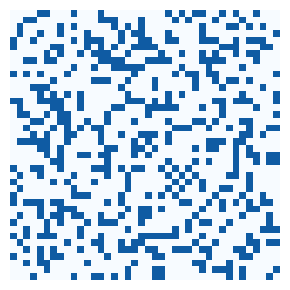

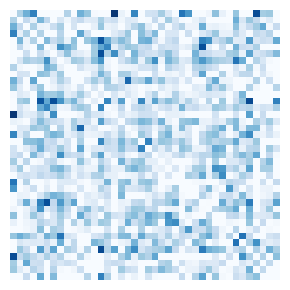

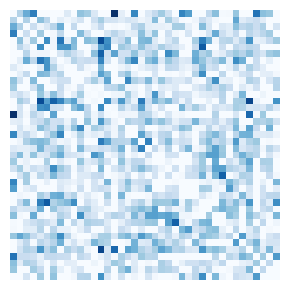

In [2]:
# Base experiment
# --------------------------------

# --------------------------------
verbose = True

N = 40
deg = 3
G = 3
edge_prob = .3
L = 3
M = 100000

opt_bias_type = 'dp'
eval_bias_type = 'dp'
REWEIGHTED = False
UPPER_BOUND = False
norm_scale = lambda A: np.sum(A[0])
# --------------------------------


# --------------------------------
alpha = 1
beta = 20e2
delta = 1e-4
eps_thresh = 1e-2

gsr_args = {
    'C':None,
    'alpha':alpha
}
fgsr_args = {
    'C':None,
    'Z':None,
    'alpha':alpha,
    'beta':beta,
    'bias_type':opt_bias_type
}

mu = 1e3
eps_init = 1e-2
factor_eps = 2
max_iters_eps = 25
if UPPER_BOUND:
    gsr_args = gsr_args | {'eps':eps_init}
    fgsr_args = fgsr_args | {'eps':eps_init}
else:
    gsr_args = gsr_args | {'mu':mu}
    fgsr_args = fgsr_args | {'mu':mu}

rw_args = {
    'delta':delta,
    'eps_thresh':eps_thresh,
    'verbose':False
}
if REWEIGHTED:
    gsr_args = gsr_args | rw_args
    fgsr_args = fgsr_args | rw_args

EstGraph = GSR if not REWEIGHTED else GSR_reweighted
EstFGraph = FGSR if not REWEIGHTED else FGSR_reweighted
# --------------------------------


# --------------------------------
A = generate_connected_er(N,edge_prob)
A_norm = A/norm_scale(A) if norm_scale(A) else np.zeros_like(A)
Z = np.eye(G)[np.sort(np.random.choice(G,N))].T
Ng = np.sum(Z,axis=1).astype(int)
fgsr_args['Z'] = Z
# --------------------------------


# --------------------------------
H = create_filter(A=A,L=L)
C = create_poly_cov(H=H)
X = poly_samples(H=H,M=M)
C_est = est_cov(X=X)
gsr_args['C'] = C_est
fgsr_args['C'] = C_est
# --------------------------------


# --------------------------------
if UPPER_BOUND:
    gsr_args['eps'] = eps_init
    fgsr_args['eps'] = eps_init
    for i_eps in range(max_iters_eps):
        A_nti = EstGraph(**gsr_args)
        A_fnti = EstFGraph(**fgsr_args)
        if (A_nti is not None) and (A_fnti is not None):
            break
        gsr_args['eps'] *= factor_eps
        fgsr_args['eps'] *= factor_eps
else:
    A_nti = EstGraph(**gsr_args)
    A_fnti = EstFGraph(**fgsr_args)
if (A_nti is None) or (A_fnti is None):
    print(f'Problem did not converge. Proceed with caution.')
A_norm_nti = A_nti/norm_scale(A_nti) if norm_scale(A_nti) else np.zeros_like(A_nti)
A_norm_fnti = A_fnti/norm_scale(A_fnti) if norm_scale(A_fnti) else np.zeros_like(A_fnti)
# --------------------------------


# --------------------------------
bias_true = compute_bias(A_norm,Z,bias_type=eval_bias_type)
bias_nti = compute_bias(A_norm_nti,Z,bias_type=eval_bias_type)
frob_nti = compute_frob_error(A_nti,A)
f1_nti = compute_f1_score(A_nti,A,eps_thresh=.2)
bias_fnti = compute_bias(A_norm_fnti,Z,bias_type=eval_bias_type)
frob_fnti = compute_frob_error(A_fnti,A)
f1_fnti = compute_f1_score(A_fnti,A,eps_thresh=.2)
# --------------------------------


# --------------------------------
print(f"Bias (true): {bias_true:.5f}")
print(f"Bias (NTI): {bias_nti:.5f}")
print(f"Bias (FNTI): {bias_fnti:.5f}")
print(f"Frob. error (NTI): {frob_nti:.5f}")
print(f"Frob. error (FNTI): {frob_fnti:.5f}")
print(f"F1-score (NTI): {f1_nti:.5f}")
print(f"F1-score (FNTI): {f1_fnti:.5f}")
# --------------------------------


# --------------------------------
vmax = np.max([np.max(A_norm),np.max(np.abs(A_norm_nti)),np.max(np.abs(A_norm_fnti))])
madimshow(A_norm,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
madimshow(np.abs(A_norm_nti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
madimshow(np.abs(A_norm_fnti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# --------------------------------



Trial 1 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 2 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 3 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 4 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 5 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 6 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 7 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 8 of 30
Group ratio 1/36
Group ratio 4/36
Group ratio 7/36
Group ratio 10/36
Group ratio 13/36
Group ratio 16/36
Trial 9 of 30
Group ratio 1/36
Group ratio 4/36


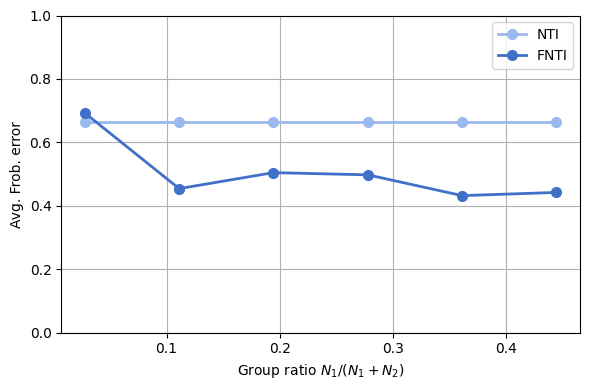

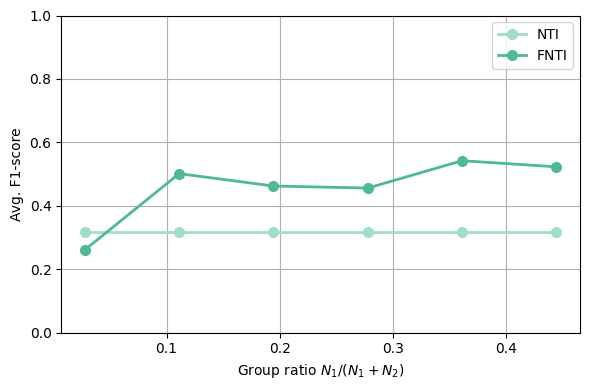

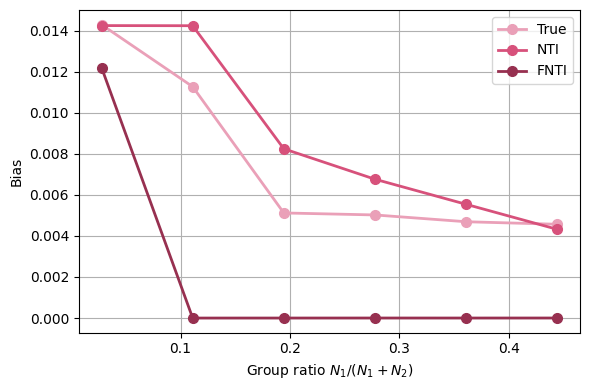

In [34]:
# Topology inference as groups become more imbalanced
# --------------------------------

# --------------------------------
verbose = True
num_trials = 30

N = 36
deg = 3
G = 2
edge_prob = .3
L = 3
M = 100000

opt_bias_type = 'dp'
eval_bias_type = 'dp'
REWEIGHTED = False
UPPER_BOUND = False
norm_scale = lambda A: np.sum(A[0])

underrep_range = np.arange(1,int(N/2)+1,3)
num_range = len(underrep_range)
# --------------------------------


# --------------------------------
alpha = 1
beta = 100e3
delta = 1e-4
eps_thresh = 1e-2

gsr_args = {
    'C':None,
    'alpha':alpha
}
fgsr_args = {
    'C':None,
    'Z':None,
    'alpha':alpha,
    'beta':beta,
    'bias_type':opt_bias_type
}

mu = 1e2
eps_init = 1e-2
factor_eps = 1.5
max_iters_eps = 25
if UPPER_BOUND:
    gsr_args = gsr_args | {'eps':eps_init}
    fgsr_args = fgsr_args | {'eps':eps_init}
else:
    gsr_args = gsr_args | {'mu':mu}
    fgsr_args = fgsr_args | {'mu':mu}

rw_args = {
    'delta':delta,
    'eps_thresh':eps_thresh,
    'verbose':False
}
if REWEIGHTED:
    gsr_args = gsr_args | rw_args
    fgsr_args = fgsr_args | rw_args

EstGraph = GSR if not REWEIGHTED else GSR_reweighted
EstFGraph = FGSR if not REWEIGHTED else FGSR_reweighted
# --------------------------------


# --------------------------------
bias_true = np.zeros((num_trials,num_range))
bias_nti = np.zeros((num_trials,num_range))
bias_fnti = np.zeros((num_trials,num_range))
frob_true = np.zeros((num_trials,num_range))
frob_nti = np.zeros((num_trials,num_range))
frob_fnti = np.zeros((num_trials,num_range))
f1_true = np.zeros((num_trials,num_range))
f1_nti = np.zeros((num_trials,num_range))
f1_fnti = np.zeros((num_trials,num_range))
# --------------------------------


# --------------------------------
A = generate_regular(N,deg)
A_norm = A/norm_scale(A) if norm_scale(A) else np.zeros_like(A)
for t in range(num_trials):
    if verbose:
        print(f'Trial {t+1} of {num_trials}')

    # --------------------------------
    H = create_filter(A=A,L=L)
    C = create_poly_cov(H=H)
    X = poly_samples(H=H,M=M)
    C_est = est_cov(X=X)
    gsr_args['C'] = C_est
    fgsr_args['C'] = C_est
    # --------------------------------

    # --------------------------------
    for i,underrep in enumerate(underrep_range):
        if verbose:
            print(f'Group ratio {underrep}/{N}')

        # --------------------------------
        z = np.ones(N,dtype=int)
        z[np.random.choice(N,underrep,replace=False)] = 0
        Z = np.eye(G)[z].T
        fgsr_args['Z'] = Z
        # --------------------------------


        # --------------------------------
        if UPPER_BOUND:
            gsr_args['eps'] = eps_init
            fgsr_args['eps'] = eps_init
            for i_eps in range(max_iters_eps):
                A_nti = EstGraph(**gsr_args)
                A_fnti = EstFGraph(**fgsr_args)
                if (A_nti is not None) and (A_fnti is not None):
                    break
                gsr_args['eps'] *= factor_eps
                fgsr_args['eps'] *= factor_eps
        else:
            A_nti = EstGraph(**gsr_args)
            A_fnti = EstFGraph(**fgsr_args)
        if (A_nti is None) or (A_fnti is None):
            print(f'Problem did not converge. Proceed with caution.')
        A_norm_nti = A_nti/norm_scale(A_nti) if norm_scale(A_nti) else np.zeros_like(A_nti)
        A_norm_fnti = A_fnti/norm_scale(A_fnti) if norm_scale(A_fnti) else np.zeros_like(A_fnti)
        # --------------------------------


        # --------------------------------
        bias_true[t,i] = compute_bias(A_norm,Z,bias_type=eval_bias_type)
        bias_nti[t,i] = compute_bias(A_norm_nti,Z,bias_type=eval_bias_type)
        frob_nti[t,i] = compute_frob_error(A_nti,A)
        f1_nti[t,i] = compute_f1_score(A_nti,A,eps_thresh=.2)
        bias_fnti[t,i] = compute_bias(A_norm_fnti,Z,bias_type=eval_bias_type)
        frob_fnti[t,i] = compute_frob_error(A_fnti,A)
        f1_fnti[t,i] = compute_f1_score(A_fnti,A,eps_thresh=.2)
        # --------------------------------
    # --------------------------------
    
# --------------------------------
plt_args = {
    'linestyle':'-',
    'marker':'o',
    'markersize':7,
    'linewidth':2
}
bias_true_mean = np.mean(bias_true,axis=0)
bias_nti_mean = np.mean(bias_nti,axis=0)
bias_fnti_mean = np.mean(bias_fnti,axis=0)
frob_nti_mean = np.mean(frob_nti,axis=0)
frob_fnti_mean = np.mean(frob_fnti,axis=0)
f1_nti_mean = np.mean(f1_nti,axis=0)
f1_fnti_mean = np.mean(f1_fnti,axis=0)
# --------------------------------


# --------------------------------
# Frob. error
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = blues[4]
ax.plot(underrep_range/N, frob_nti_mean, **plt_args, label='NTI')
plt_args['c'] = blues[12]
ax.plot(underrep_range/N, frob_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Group ratio '+r'$N_1/(N_1+N_2)$')
ax.set_ylabel('Avg. Frob. error')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# F1-score
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = greens[4]
ax.plot(underrep_range/N, f1_nti_mean, **plt_args, label='NTI')
plt_args['c'] = greens[12]
ax.plot(underrep_range/N, f1_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Group ratio '+r'$N_1/(N_1+N_2)$')
ax.set_ylabel('Avg. F1-score')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# Bias
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = reds[4]
ax.plot(underrep_range/N, bias_true_mean, **plt_args, label='True')
plt_args['c'] = reds[10]
ax.plot(underrep_range/N, bias_nti_mean, **plt_args, label='NTI')
plt_args['c'] = reds[16]
ax.plot(underrep_range/N, bias_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Group ratio '+r'$N_1/(N_1+N_2)$')
ax.set_ylabel('Bias')
ax.legend()
fig.tight_layout()
# --------------------------------


# # --------------------------------
# vmax = np.max([np.max(A),np.max(np.abs(A_nti)),np.max(np.abs(A_fnti))])
# madimshow(A,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_nti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_fnti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# # --------------------------------


Trial 1 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 2 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 3 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 4 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 5 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 6 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 7 of 30
Edge weight 0.000
Edge weight 0.333
Edge weight 0.667
Edge weight 1.000
Edge weight 1.333
Edge weight 1.667
Edge weight 2.000
Trial 8 of 30
Edge w

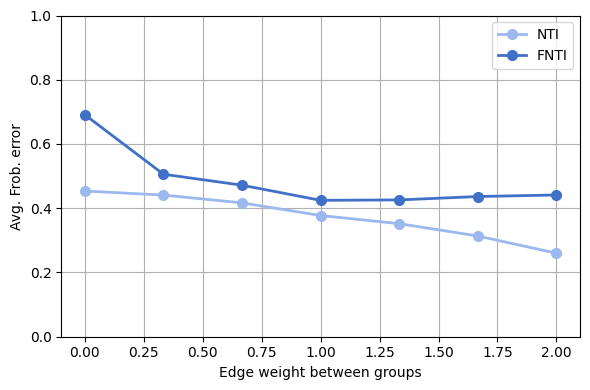

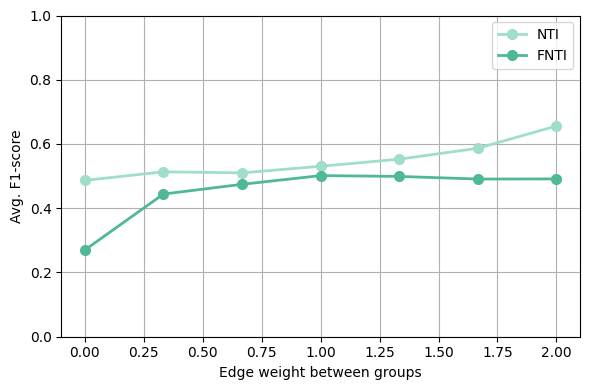

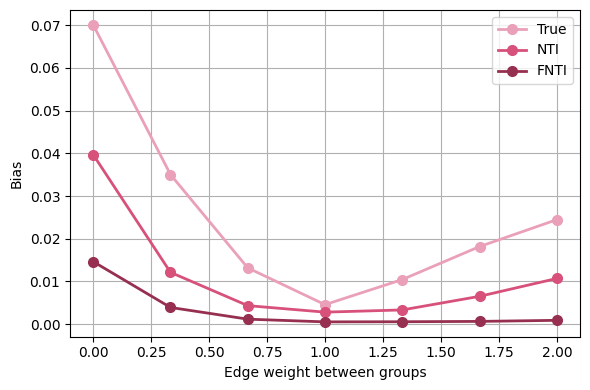

In [35]:
# Topology inference as cross-group edge weights increase
# --------------------------------

# --------------------------------
verbose = True
num_trials = 30
num_range = 7

N = 36
G = 2
edge_prob = .3
L = 3
M = 100000

opt_bias_type = 'dp'
eval_bias_type = 'dp'
REWEIGHTED = False
UPPER_BOUND = False
norm_scale = lambda A: np.sum(A[0])

weight_range = np.linspace(0,2,num_range)
# --------------------------------


# --------------------------------
alpha = 1
beta = 100e3
delta = 1e-4
eps_thresh = 1e-2

gsr_args = {
    'C':None,
    'alpha':alpha
}
fgsr_args = {
    'C':None,
    'Z':None,
    'alpha':alpha,
    'beta':beta,
    'bias_type':opt_bias_type
}

mu = 1e2
eps_init = 1e-2
factor_eps = 1.5
max_iters_eps = 25
if UPPER_BOUND:
    gsr_args = gsr_args | {'eps':eps_init}
    fgsr_args = fgsr_args | {'eps':eps_init}
else:
    gsr_args = gsr_args | {'mu':mu}
    fgsr_args = fgsr_args | {'mu':mu}

rw_args = {
    'delta':delta,
    'eps_thresh':eps_thresh,
    'verbose':False
}
if REWEIGHTED:
    gsr_args = gsr_args | rw_args
    fgsr_args = fgsr_args | rw_args

EstGraph = GSR if not REWEIGHTED else GSR_reweighted
EstFGraph = FGSR if not REWEIGHTED else FGSR_reweighted
# --------------------------------


# --------------------------------
bias_true = np.zeros((num_trials,num_range))
bias_nti = np.zeros((num_trials,num_range))
bias_fnti = np.zeros((num_trials,num_range))
frob_true = np.zeros((num_trials,num_range))
frob_nti = np.zeros((num_trials,num_range))
frob_fnti = np.zeros((num_trials,num_range))
f1_true = np.zeros((num_trials,num_range))
f1_nti = np.zeros((num_trials,num_range))
f1_fnti = np.zeros((num_trials,num_range))
# --------------------------------


# --------------------------------
for t in range(num_trials):
    if verbose:
        print(f'Trial {t+1} of {num_trials}')

    # --------------------------------
    A0 = generate_connected_er(N,edge_prob).astype(float)
    z = np.ones(N,dtype=int)
    z[:int(N/2)] = 0
    Z = np.eye(G)[z].T
    fgsr_args['Z'] = Z
    # --------------------------------

    for i,ew in enumerate(weight_range):
        if verbose:
            print(f'Edge weight {ew:.3f}')

        # --------------------------------
        A = A0.copy()
        A[np.where(z==0)[0][:,None],np.where(z==1)[0][None]] *= ew
        A[np.where(z==1)[0][:,None],np.where(z==0)[0][None]] *= ew
        A_norm = A/norm_scale(A) if norm_scale(A) else np.zeros_like(A)
        H = create_filter(A=A,L=L)
        C = create_poly_cov(H=H)
        X = poly_samples(H=H,M=M)
        C_est = est_cov(X=X)
        gsr_args['C'] = C_est
        fgsr_args['C'] = C_est
        # --------------------------------


        # --------------------------------
        if UPPER_BOUND:
            gsr_args['eps'] = eps_init
            fgsr_args['eps'] = eps_init
            for i_eps in range(max_iters_eps):
                A_nti = EstGraph(**gsr_args)
                A_fnti = EstFGraph(**fgsr_args)
                if (A_nti is not None) and (A_fnti is not None):
                    break
                gsr_args['eps'] *= factor_eps
                fgsr_args['eps'] *= factor_eps
        else:
            A_nti = EstGraph(**gsr_args)
            A_fnti = EstFGraph(**fgsr_args)
        if (A_nti is None) or (A_fnti is None):
            print(f'Problem did not converge. Proceed with caution.')
        A_norm_nti = A_nti/norm_scale(A_nti) if norm_scale(A_nti) else np.zeros_like(A_nti)
        A_norm_fnti = A_fnti/norm_scale(A_fnti) if norm_scale(A_fnti) else np.zeros_like(A_fnti)
        # --------------------------------



        # --------------------------------
        bias_true[t,i] = compute_bias(A_norm,Z,bias_type=eval_bias_type)
        bias_nti[t,i] = compute_bias(A_norm_nti,Z,bias_type=eval_bias_type)
        frob_nti[t,i] = compute_frob_error(A_nti,A)
        f1_nti[t,i] = compute_f1_score(A_nti,A,eps_thresh=.2)
        bias_fnti[t,i] = compute_bias(A_norm_fnti,Z,bias_type=eval_bias_type)
        frob_fnti[t,i] = compute_frob_error(A_fnti,A)
        f1_fnti[t,i] = compute_f1_score(A_fnti,A,eps_thresh=.2)
        # --------------------------------
    # --------------------------------
# --------------------------------


# --------------------------------
plt_args = {
    'linestyle':'-',
    'marker':'o',
    'markersize':7,
    'linewidth':2
}
bias_true_mean = np.mean(bias_true,axis=0)
bias_nti_mean = np.mean(bias_nti,axis=0)
bias_fnti_mean = np.mean(bias_fnti,axis=0)
frob_nti_mean = np.mean(frob_nti,axis=0)
frob_fnti_mean = np.mean(frob_fnti,axis=0)
f1_nti_mean = np.mean(f1_nti,axis=0)
f1_fnti_mean = np.mean(f1_fnti,axis=0)
# --------------------------------


# --------------------------------
# Frob. error
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = blues[4]
ax.plot(weight_range, frob_nti_mean, **plt_args, label='NTI')
plt_args['c'] = blues[12]
ax.plot(weight_range, frob_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge weight between groups')
ax.set_ylabel('Avg. Frob. error')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# F1-score
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = greens[4]
ax.plot(weight_range, f1_nti_mean, **plt_args, label='NTI')
plt_args['c'] = greens[12]
ax.plot(weight_range, f1_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge weight between groups')
ax.set_ylabel('Avg. F1-score')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# Bias
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = reds[4]
ax.plot(weight_range, bias_true_mean, **plt_args, label='True')
plt_args['c'] = reds[10]
ax.plot(weight_range, bias_nti_mean, **plt_args, label='NTI')
plt_args['c'] = reds[16]
ax.plot(weight_range, bias_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge weight between groups')
ax.set_ylabel('Bias')
ax.legend()
fig.tight_layout()
# --------------------------------


# # --------------------------------
# vmax = np.max([np.max(A),np.max(np.abs(A_nti)),np.max(np.abs(A_fnti))])
# madimshow(A,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_nti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_fnti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# # --------------------------------


Trial 1 of 30
Across-class edge ratio 0.143
Across-class edge ratio 0.286
Across-class edge ratio 0.429
Across-class edge ratio 0.571
Across-class edge ratio 0.714
Across-class edge ratio 0.857
Across-class edge ratio 1.000
Trial 2 of 30
Across-class edge ratio 0.143
Across-class edge ratio 0.286
Across-class edge ratio 0.429
Across-class edge ratio 0.571
Across-class edge ratio 0.714
Across-class edge ratio 0.857
Across-class edge ratio 1.000
Trial 3 of 30
Across-class edge ratio 0.143
Across-class edge ratio 0.286
Across-class edge ratio 0.429
Across-class edge ratio 0.571
Across-class edge ratio 0.714
Across-class edge ratio 0.857
Across-class edge ratio 1.000
Trial 4 of 30
Across-class edge ratio 0.143
Across-class edge ratio 0.286
Across-class edge ratio 0.429
Across-class edge ratio 0.571
Across-class edge ratio 0.714
Across-class edge ratio 0.857
Across-class edge ratio 1.000
Trial 5 of 30
Across-class edge ratio 0.143
Across-class edge ratio 0.286
Across-class edge ratio 0.429


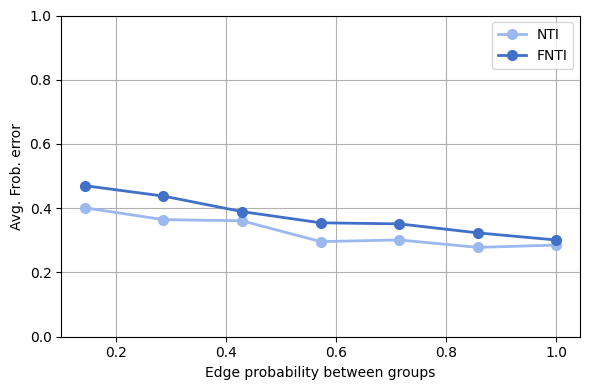

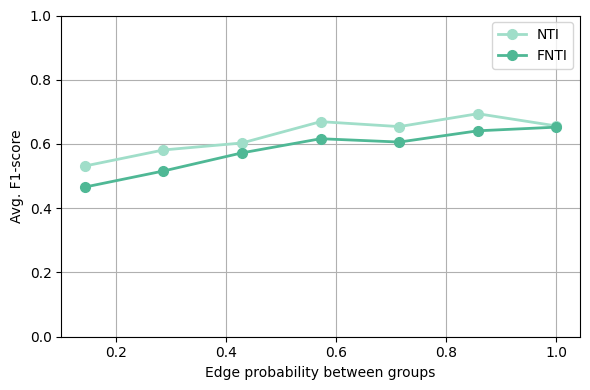

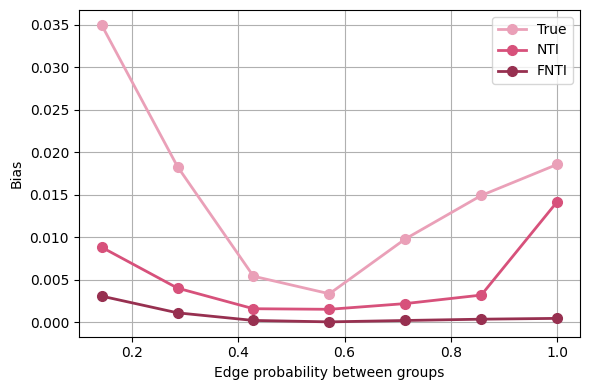

In [36]:
# Topology inference as cross-group edges increase
# --------------------------------

# --------------------------------
verbose = True
num_trials = 30
num_range = 7

N = 36
G = 2
in_prob = .5
num_blocks = 2
node_labels_sbm = np.ones(N,dtype=int)
node_labels_sbm[:int(N/2)] = 0
L = 3
M = 100000

opt_bias_type = 'dp'
eval_bias_type = 'dp'
REWEIGHTED = False
UPPER_BOUND = False
norm_scale = lambda A: np.sum(A[0])

outprob_range = np.linspace(0,1,num_range+1)[1:]
# --------------------------------


# --------------------------------
alpha = 1
beta = 100e3
delta = 1e-4
eps_thresh = 1e-2

gsr_args = {
    'C':None,
    'alpha':alpha
}
fgsr_args = {
    'C':None,
    'Z':None,
    'alpha':alpha,
    'beta':beta,
    'bias_type':opt_bias_type
}

mu = 1e2
eps_init = 1e-2
factor_eps = 1.5
max_iters_eps = 25
if UPPER_BOUND:
    gsr_args = gsr_args | {'eps':eps_init}
    fgsr_args = fgsr_args | {'eps':eps_init}
else:
    gsr_args = gsr_args | {'mu':mu}
    fgsr_args = fgsr_args | {'mu':mu}

rw_args = {
    'delta':delta,
    'eps_thresh':eps_thresh,
    'verbose':False
}
if REWEIGHTED:
    gsr_args = gsr_args | rw_args
    fgsr_args = fgsr_args | rw_args

EstGraph = GSR if not REWEIGHTED else GSR_reweighted
EstFGraph = FGSR if not REWEIGHTED else FGSR_reweighted
# --------------------------------


# --------------------------------
bias_true = np.zeros((num_trials,num_range))
bias_nti = np.zeros((num_trials,num_range))
bias_fnti = np.zeros((num_trials,num_range))
frob_true = np.zeros((num_trials,num_range))
frob_nti = np.zeros((num_trials,num_range))
frob_fnti = np.zeros((num_trials,num_range))
f1_true = np.zeros((num_trials,num_range))
f1_nti = np.zeros((num_trials,num_range))
f1_fnti = np.zeros((num_trials,num_range))
# --------------------------------


# --------------------------------
for t in range(num_trials):
    if verbose:
        print(f'Trial {t+1} of {num_trials}')

    # --------------------------------
    A0 = generate_ksbm(N,num_blocks,in_prob,0,block_assign=node_labels_sbm)
    z = node_labels_sbm.copy()
    Z = np.eye(G)[z].T
    fgsr_args['Z'] = Z
    # --------------------------------

    for i,out_prob in enumerate(outprob_range):
        if verbose:
            print(f'Across-class edge ratio {out_prob:.3f}')

        # --------------------------------
        A = A0.copy()
        A[np.where(z==0)[0][:,None],np.where(z==1)[0][None]] = np.random.binomial(1,out_prob,(np.sum(z==0),np.sum(z==1)))
        A[np.where(z==1)[0][:,None],np.where(z==0)[0][None]] = A[np.where(z==0)[0][:,None],np.where(z==1)[0][None]].T
        A_norm = A/norm_scale(A) if norm_scale(A) else np.zeros_like(A)
        H = create_filter(A=A,L=L)
        C = create_poly_cov(H=H)
        X = poly_samples(H=H,M=M)
        C_est = est_cov(X=X)
        gsr_args['C'] = C_est
        fgsr_args['C'] = C_est
        # --------------------------------


        # --------------------------------
        if UPPER_BOUND:
            gsr_args['eps'] = eps_init
            fgsr_args['eps'] = eps_init
            for i_eps in range(max_iters_eps):
                A_nti = EstGraph(**gsr_args)
                A_fnti = EstFGraph(**fgsr_args)
                if (A_nti is not None) and (A_fnti is not None):
                    break
                gsr_args['eps'] *= factor_eps
                fgsr_args['eps'] *= factor_eps
        else:
            A_nti = EstGraph(**gsr_args)
            A_fnti = EstFGraph(**fgsr_args)
        if (A_nti is None) or (A_fnti is None):
            print(f'Problem did not converge. Proceed with caution.')
        A_norm_nti = A_nti/norm_scale(A_nti) if norm_scale(A_nti) else np.zeros_like(A_nti)
        A_norm_fnti = A_fnti/norm_scale(A_fnti) if norm_scale(A_fnti) else np.zeros_like(A_fnti)
        # --------------------------------



        # --------------------------------
        bias_true[t,i] = compute_bias(A_norm,Z,bias_type=eval_bias_type)
        bias_nti[t,i] = compute_bias(A_norm_nti,Z,bias_type=eval_bias_type)
        frob_nti[t,i] = compute_frob_error(A_nti,A)
        f1_nti[t,i] = compute_f1_score(A_nti,A,eps_thresh=.2)
        bias_fnti[t,i] = compute_bias(A_norm_fnti,Z,bias_type=eval_bias_type)
        frob_fnti[t,i] = compute_frob_error(A_fnti,A)
        f1_fnti[t,i] = compute_f1_score(A_fnti,A,eps_thresh=.2)
        # --------------------------------
    # --------------------------------
# --------------------------------


# --------------------------------
plt_args = {
    'linestyle':'-',
    'marker':'o',
    'markersize':7,
    'linewidth':2
}
bias_true_mean = np.mean(bias_true,axis=0)
bias_nti_mean = np.mean(bias_nti,axis=0)
bias_fnti_mean = np.mean(bias_fnti,axis=0)
frob_nti_mean = np.mean(frob_nti,axis=0)
frob_fnti_mean = np.mean(frob_fnti,axis=0)
f1_nti_mean = np.mean(f1_nti,axis=0)
f1_fnti_mean = np.mean(f1_fnti,axis=0)
# --------------------------------


# --------------------------------
# Frob. error
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = blues[4]
ax.plot(outprob_range, frob_nti_mean, **plt_args, label='NTI')
plt_args['c'] = blues[12]
ax.plot(outprob_range, frob_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge probability between groups')
ax.set_ylabel('Avg. Frob. error')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# F1-score
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = greens[4]
ax.plot(outprob_range, f1_nti_mean, **plt_args, label='NTI')
plt_args['c'] = greens[12]
ax.plot(outprob_range, f1_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge probability between groups')
ax.set_ylabel('Avg. F1-score')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# Bias
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = reds[4]
ax.plot(outprob_range, bias_true_mean, **plt_args, label='True')
plt_args['c'] = reds[10]
ax.plot(outprob_range, bias_nti_mean, **plt_args, label='NTI')
plt_args['c'] = reds[16]
ax.plot(outprob_range, bias_fnti_mean, **plt_args, label='FNTI')

ax.set_xlabel('Edge probability between groups')
ax.set_ylabel('Bias')
ax.legend()
fig.tight_layout()
# --------------------------------


# # --------------------------------
# vmax = np.max([np.max(A),np.max(np.abs(A_nti)),np.max(np.abs(A_fnti))])
# madimshow(A,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_nti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(np.abs(A_fnti),axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# # --------------------------------


Trial 1 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 2 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 3 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 4 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 5 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 6 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 7 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta: 1.0000e+06
Beta: 4.6416e+06
Beta: 2.1544e+07
Beta: 1.0000e+08
Trial 8 of 20
Beta: 1.0000e+04
Beta: 4.6416e+04
Beta: 2.1544e+05
Beta

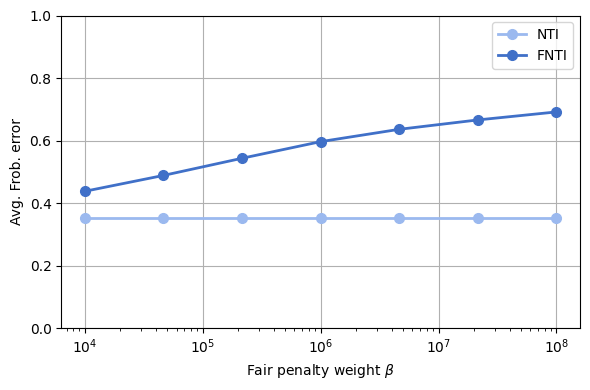

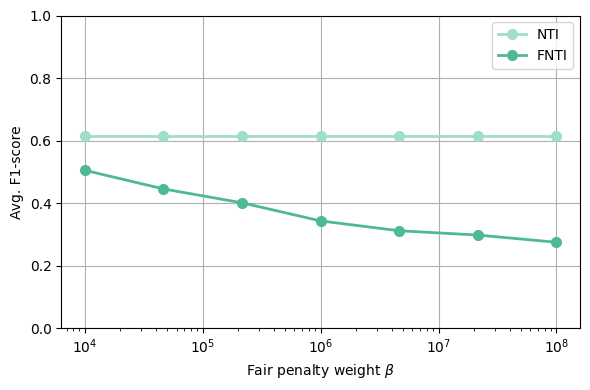

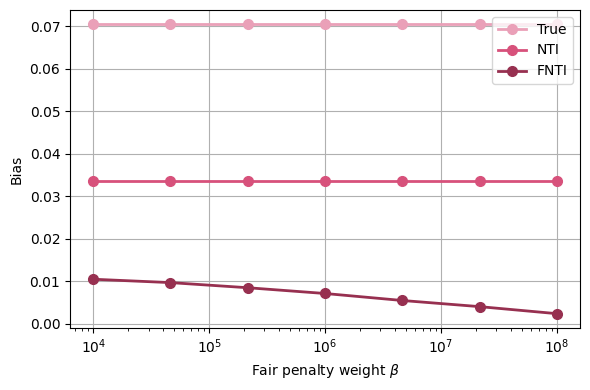

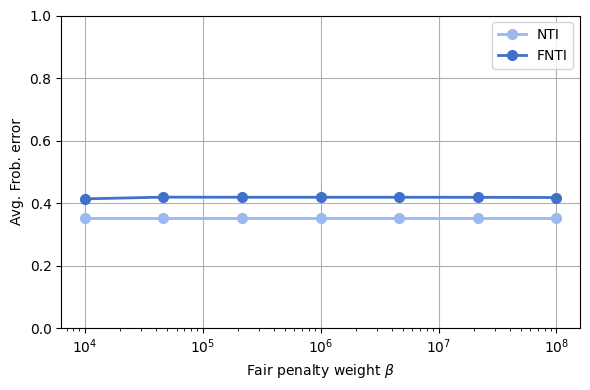

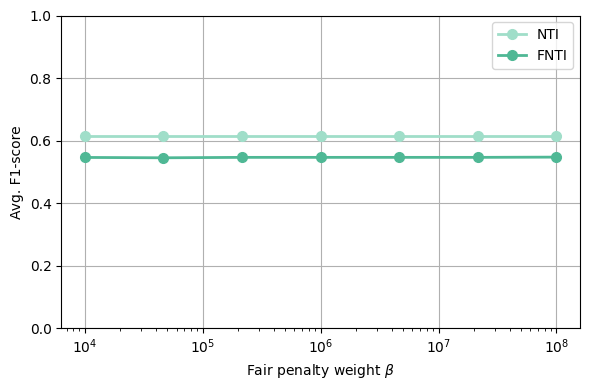

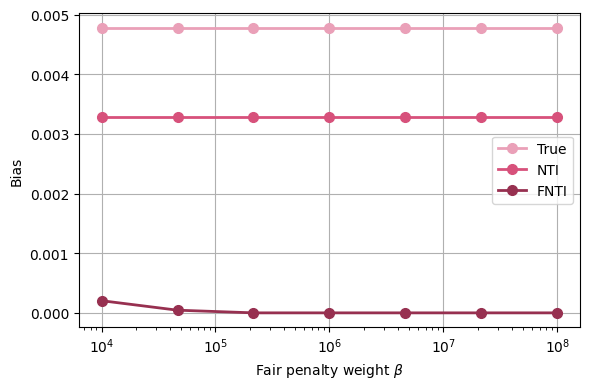

In [37]:
# Fair 2-SBM and biased 2-SBM as fairness penalty grows
# --------------------------------

# --------------------------------
verbose = True
num_trials = 20
num_range = 7

N = 24
G = 2
in_prob = .8
out_prob = .1
num_blocks = 2
node_labels_sbm = np.ones(N)
node_labels_sbm[:int(N/2)] = 0
L = 3
M = 100000

opt_bias_type = 'dp'
eval_bias_type = 'dp'
REWEIGHTED = False
UPPER_BOUND = False
norm_scale = lambda A: np.sum(A[0])

beta_range = np.logspace(1,5,num_range)*1e3
num_range = len(beta_range)
# --------------------------------


# --------------------------------
alpha = 1
beta = 100e3
delta = 1e-4
eps_thresh = 1e-2

gsr_args = {
    'C':None,
    'alpha':alpha
}
fgsr_args = {
    'C':None,
    'Z':None,
    'alpha':alpha,
    'beta':beta,
    'bias_type':opt_bias_type
}

mu = 1e2
eps_init = 1e-2
factor_eps = 1.5
max_iters_eps = 25
if UPPER_BOUND:
    gsr_args = gsr_args | {'eps':eps_init}
    fgsr_args = fgsr_args | {'eps':eps_init}
else:
    gsr_args = gsr_args | {'mu':mu}
    fgsr_args = fgsr_args | {'mu':mu}

rw_args = {
    'delta':delta,
    'eps_thresh':eps_thresh,
    'verbose':False
}
if REWEIGHTED:
    gsr_args = gsr_args | rw_args
    fgsr_args = fgsr_args | rw_args

EstGraph = GSR if not REWEIGHTED else GSR_reweighted
EstFGraph = FGSR if not REWEIGHTED else FGSR_reweighted
# --------------------------------


# --------------------------------
bias_true_unfair = np.zeros((num_trials,num_range))
bias_nti_unfair = np.zeros((num_trials,num_range))
bias_fnti_unfair = np.zeros((num_trials,num_range))
frob_true_unfair = np.zeros((num_trials,num_range))
frob_nti_unfair = np.zeros((num_trials,num_range))
frob_fnti_unfair = np.zeros((num_trials,num_range))
f1_true_unfair = np.zeros((num_trials,num_range))
f1_nti_unfair = np.zeros((num_trials,num_range))
f1_fnti_unfair = np.zeros((num_trials,num_range))

bias_true_fair = np.zeros((num_trials,num_range))
bias_nti_fair = np.zeros((num_trials,num_range))
bias_fnti_fair = np.zeros((num_trials,num_range))
frob_true_fair = np.zeros((num_trials,num_range))
frob_nti_fair = np.zeros((num_trials,num_range))
frob_fnti_fair = np.zeros((num_trials,num_range))
f1_true_fair = np.zeros((num_trials,num_range))
f1_nti_fair = np.zeros((num_trials,num_range))
f1_fnti_fair = np.zeros((num_trials,num_range))
# --------------------------------


# --------------------------------
for t in range(num_trials):
    if verbose:
        print(f'Trial {t+1} of {num_trials}')

    # --------------------------------
    A = generate_ksbm(N,num_blocks,in_prob,out_prob,block_assign=node_labels_sbm)
    A_norm = A/norm_scale(A) if norm_scale(A) else np.zeros_like(A)
    H = create_filter(A=A,L=L)
    C = create_poly_cov(H=H)
    X = poly_samples(H=H,M=M)
    C_est = est_cov(X=X)
    gsr_args['C'] = C_est
    fgsr_args['C'] = C_est
    # --------------------------------


    # --------------------------------
    z_unfair = np.ones(N,dtype=int)
    z_unfair[:int(N/2)] = 0
    Z_unfair = np.eye(G)[z_unfair].T
    # z_fair = z_unfair[np.random.permutation(N)]
    z_fair = np.ones(N,dtype=int)
    z_fair[np.arange(0,N,2)] = 0
    Z_fair = np.eye(G)[z_fair].T
    # --------------------------------

    for i,beta in enumerate(beta_range):
        if verbose:
            print(f'Beta: {beta:.4e}')
        fgsr_args['beta'] = beta

        # --------------------------------
        fgsr_args['Z'] = Z_unfair
        if UPPER_BOUND:
            gsr_args['eps'] = eps_init
            fgsr_args['eps'] = eps_init
            for i_eps in range(max_iters_eps):
                A_unfair_nti = EstGraph(**gsr_args)
                A_unfair_fnti = EstFGraph(**fgsr_args)
                if (A_unfair_nti is not None) and (A_unfair_fnti is not None):
                    break
                gsr_args['eps'] *= factor_eps
                fgsr_args['eps'] *= factor_eps
        else:
            A_unfair_nti = EstGraph(**gsr_args)
            A_unfair_fnti = EstFGraph(**fgsr_args)
        if (A_unfair_nti is None) or (A_unfair_fnti is None):
            print(f'Problem did not converge. Proceed with caution.')
        A_unfair_norm_nti = A_unfair_nti/norm_scale(A_unfair_nti) if norm_scale(A_unfair_nti) else np.zeros_like(A_unfair_nti)
        A_unfair_norm_fnti = A_unfair_fnti/norm_scale(A_unfair_fnti) if norm_scale(A_unfair_fnti) else np.zeros_like(A_unfair_fnti)
        # --------------------------------


        # --------------------------------
        fgsr_args['Z'] = Z_fair
        if UPPER_BOUND:
            gsr_args['eps'] = eps_init
            fgsr_args['eps'] = eps_init
            for i_eps in range(max_iters_eps):
                A_fair_nti = EstGraph(**gsr_args)
                A_fair_fnti = EstFGraph(**fgsr_args)
                if (A_fair_nti is not None) and (A_fair_fnti is not None):
                    break
                gsr_args['eps'] *= factor_eps
                fgsr_args['eps'] *= factor_eps
        else:
            A_fair_nti = EstGraph(**gsr_args)
            A_fair_fnti = EstFGraph(**fgsr_args)
        if (A_fair_nti is None) or (A_fair_fnti is None):
            print(f'Problem did not converge. Proceed with caution.')
        A_fair_norm_nti = A_fair_nti/norm_scale(A_fair_nti) if norm_scale(A_fair_nti) else np.zeros_like(A_fair_nti)
        A_fair_norm_fnti = A_fair_fnti/norm_scale(A_fair_fnti) if norm_scale(A_fair_fnti) else np.zeros_like(A_fair_fnti)
        # --------------------------------



        # --------------------------------
        bias_true_unfair[t,i] = compute_bias(A_norm,Z_unfair,bias_type=eval_bias_type)
        bias_nti_unfair[t,i] = compute_bias(A_unfair_norm_nti,Z_unfair,bias_type=eval_bias_type)
        frob_nti_unfair[t,i] = compute_frob_error(A_unfair_nti,A)
        f1_nti_unfair[t,i] = compute_f1_score(A_unfair_nti,A,eps_thresh=.2)
        bias_fnti_unfair[t,i] = compute_bias(A_unfair_norm_fnti,Z_unfair,bias_type=eval_bias_type)
        frob_fnti_unfair[t,i] = compute_frob_error(A_unfair_fnti,A)
        f1_fnti_unfair[t,i] = compute_f1_score(A_unfair_fnti,A,eps_thresh=.2)

        bias_true_fair[t,i] = compute_bias(A_norm,Z_fair,bias_type=eval_bias_type)
        bias_nti_fair[t,i] = compute_bias(A_fair_norm_nti,Z_fair,bias_type=eval_bias_type)
        frob_nti_fair[t,i] = compute_frob_error(A_fair_nti,A)
        f1_nti_fair[t,i] = compute_f1_score(A_fair_nti,A,eps_thresh=.2)
        bias_fnti_fair[t,i] = compute_bias(A_fair_norm_fnti,Z_fair,bias_type=eval_bias_type)
        frob_fnti_fair[t,i] = compute_frob_error(A_fair_fnti,A)
        f1_fnti_fair[t,i] = compute_f1_score(A_fair_fnti,A,eps_thresh=.2)
        # --------------------------------
    # --------------------------------
# --------------------------------


# --------------------------------
plt_args = {
    'linestyle':'-',
    'marker':'o',
    'markersize':7,
    'linewidth':2
}
bias_true_unfair_mean = np.mean(bias_true_unfair,axis=0)
bias_nti_unfair_mean = np.mean(bias_nti_unfair,axis=0)
bias_fnti_unfair_mean = np.mean(bias_fnti_unfair,axis=0)
frob_nti_unfair_mean = np.mean(frob_nti_unfair,axis=0)
frob_fnti_unfair_mean = np.mean(frob_fnti_unfair,axis=0)
f1_nti_unfair_mean = np.mean(f1_nti_unfair,axis=0)
f1_fnti_unfair_mean = np.mean(f1_fnti_unfair,axis=0)

bias_true_fair_mean = np.mean(bias_true_fair,axis=0)
bias_nti_fair_mean = np.mean(bias_nti_fair,axis=0)
bias_fnti_fair_mean = np.mean(bias_fnti_fair,axis=0)
frob_nti_fair_mean = np.mean(frob_nti_fair,axis=0)
frob_fnti_fair_mean = np.mean(frob_fnti_fair,axis=0)
f1_nti_fair_mean = np.mean(f1_nti_fair,axis=0)
f1_fnti_fair_mean = np.mean(f1_fnti_fair,axis=0)
# --------------------------------


# --------------------------------
# Frob. error
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = blues[4]
ax.semilogx(beta_range, frob_nti_unfair_mean, **plt_args, label='NTI')
plt_args['c'] = blues[12]
ax.semilogx(beta_range, frob_fnti_unfair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Avg. Frob. error')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# F1-score
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = greens[4]
ax.semilogx(beta_range, f1_nti_unfair_mean, **plt_args, label='NTI')
plt_args['c'] = greens[12]
ax.semilogx(beta_range, f1_fnti_unfair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Avg. F1-score')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# Bias
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = reds[4]
ax.semilogx(beta_range, bias_true_unfair_mean, **plt_args, label='True')
plt_args['c'] = reds[10]
ax.semilogx(beta_range, bias_nti_unfair_mean, **plt_args, label='NTI')
plt_args['c'] = reds[16]
ax.semilogx(beta_range, bias_fnti_unfair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Bias')
ax.legend()
fig.tight_layout()
# --------------------------------


# --------------------------------
# Frob. error
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = blues[4]
ax.semilogx(beta_range, frob_nti_fair_mean, **plt_args, label='NTI')
plt_args['c'] = blues[12]
ax.semilogx(beta_range, frob_fnti_fair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Avg. Frob. error')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# F1-score
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = greens[4]
ax.semilogx(beta_range, f1_nti_fair_mean, **plt_args, label='NTI')
plt_args['c'] = greens[12]
ax.semilogx(beta_range, f1_fnti_fair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Avg. F1-score')
ax.set_ylim([0,1])
ax.legend()
fig.tight_layout()
# --------------------------------

# --------------------------------
# Bias
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.grid(True)
plt_args['c'] = reds[4]
ax.semilogx(beta_range, bias_true_fair_mean, **plt_args, label='True')
plt_args['c'] = reds[10]
ax.semilogx(beta_range, bias_nti_fair_mean, **plt_args, label='NTI')
plt_args['c'] = reds[16]
ax.semilogx(beta_range, bias_fnti_fair_mean, **plt_args, label='FNTI')

ax.set_xlabel('Fair penalty weight '+r'$\beta$')
ax.set_ylabel('Bias')
ax.legend()
fig.tight_layout()
# --------------------------------


# # --------------------------------
# vmax = np.max([np.max(A_norm),np.max(A_unfair_norm_nti),np.max(A_unfair_norm_fnti)])
# madimshow(A_norm,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(A_unfair_norm_nti,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(A_unfair_norm_fnti,axis=False,vmin=0,vmax=vmax,figsize=(3,3))

# vmax = np.max([np.max(A_norm),np.max(A_fair_norm_nti),np.max(A_fair_norm_fnti)])
# madimshow(A_norm,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(A_fair_norm_nti,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# madimshow(A_fair_norm_fnti,axis=False,vmin=0,vmax=vmax,figsize=(3,3))
# # --------------------------------


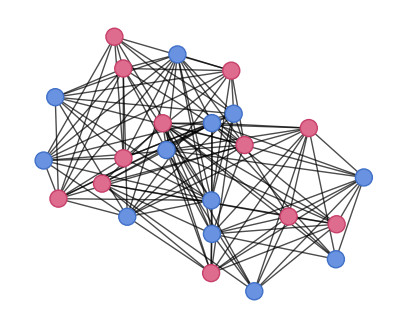

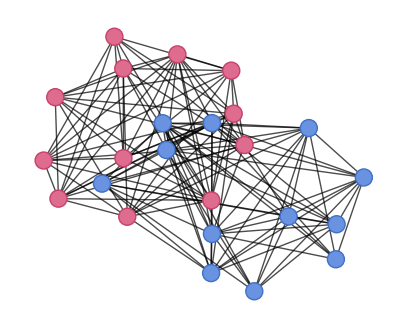

In [39]:
import networkx as nx

pos = nx.spring_layout(nx.Graph(A),k=10/np.sqrt(N))

# --------------------------------
fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.axis('off')
nx.draw_networkx_edges(nx.Graph(A), 
                       pos=pos, 
                       width=1,
                       alpha=.7,
                       edge_color='k')
nx.draw_networkx_nodes(nx.Graph(A), 
                       pos=pos, 
                       node_size=150,
                       linewidths=1,
                       node_color=[reds[8] if z==0 else blues[8] for z in z_fair],
                       edgecolors=[reds[12] if z==0 else blues[12] for z in z_fair]
                       )

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.axis('off')
nx.draw_networkx_edges(nx.Graph(A), 
                       pos=pos, 
                       width=1,
                       alpha=.7,
                       edge_color='k')
nx.draw_networkx_nodes(nx.Graph(A), 
                       pos=pos, 
                       node_size=150,
                       linewidths=1,
                       node_color=[reds[8] if z==0 else blues[8] for z in z_unfair],
                       edgecolors=[reds[12] if z==0 else blues[12] for z in z_unfair]
                       )
# --------------------------------
